# 1) Load and plot shipping 

In [1]:
# ! pip install netCDF4 

In [2]:
# ! pip install matplotlib

In [3]:
# ! pip install xarray

In [4]:
# ! pip install cartopy

In [5]:
from netCDF4 import Dataset as netcdf 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import shutil
import urllib.request as request
from contextlib import closing
import os



In [6]:
# ! ls /Users/micheltsamados/Google\ Drive/My\ Drive/ADMINISTRATION/ShippingWeatherRescue


In [7]:
# ! ls 

In [8]:
# ! ls /Users/micheltsamados/Downloads/


In [15]:
#load ICOADS data
# https://www.ncei.noaa.gov/data/international-comprehensive-ocean-atmosphere/v3/archive/nrt/ICOADS_R3.0.0_1891-01.nc
filepath='/Users/micheltsamados/Downloads/'
ds = xr.open_dataset(filepath+'icoads-nrt_r3.0.2_final_d201503_c20230510.nc')
print(ds)

<xarray.Dataset>
Dimensions:  (obs: 4440318)
Coordinates:
    time     (obs) datetime64[ns] ...
    lat      (obs) float32 ...
    lon      (obs) float32 ...
Dimensions without coordinates: obs
Data variables: (12/94)
    date     (obs) |S8 ...
    crs      int32 ...
    HR       (obs) float32 ...
    TI       (obs) float32 ...
    LI       (obs) float32 ...
    DS       (obs) float32 ...
    ...       ...
    OTV      (obs) float32 ...
    OTZ      (obs) float32 ...
    OSV      (obs) float32 ...
    OSZ      (obs) float32 ...
    UID      (obs) |S6 ...
    IRF      (obs) float32 ...
Attributes: (12/58)
    ncei_template_version:     NCEI_NetCDF_Point_Template_v2.0
    featureType:               point
    title:                     International Comprehensive Ocean-Atmosphere D...
    summary:                   This file contains ICOADS v3.0.2 data in netCD...
    keywords:                  Earth Science > Oceans > Salinity/Density > Sa...
    Conventions:               CF-1.6, ACDD-1

In [11]:
filepath

'/Users/micheltsamados/Downloads/'

In [12]:
# ! pip install wget

In [13]:
# ! pip install nctoolkit

In [13]:
# import shutil
# import urllib.request as request
# from contextlib import closing
# import os


# yearstr='2000'
# monthstr='01'

# def download(fp1,fp2):
#     with closing(request.urlopen(fp1+fp2)) as r:
#         with open(fp2, 'wb') as f:
#             shutil.copyfileobj(r, f)
            
            
# urlpath='https://ncei.noaa.gov/data/international-comprehensive-ocean-atmosphere/v3/archive/nrt/'
# urlfile = 'ICOADS_R3.0.0_'+yearstr+'-'+monthstr+'.nc'
# download(urlpath,urlfile)

# ds2 = xr.open_dataset(urlfile)

# #remove downloaded files
# os.remove(urlfile)

In [14]:
# ! ls -lrt 

In [16]:
ds.lon

<xarray.DataArray 'lon' (obs: 4440318)>
[4440318 values with dtype=float32]
Coordinates:
    time     (obs) datetime64[ns] ...
    lat      (obs) float32 ...
    lon      (obs) float32 ...
Dimensions without coordinates: obs
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    valid_min:      0.0
    valid_max:      359.99
    axis:           X

In [42]:
###### Download ######

year=2020
yearstr=str(year)
monthstr='03'

def download(fp1,fp2):
    with closing(request.urlopen(fp1+fp2)) as r:
        with open(fp2, 'wb') as f:
            shutil.copyfileobj(r, f)
            
            
urlpath='https://ncei.noaa.gov/data/international-comprehensive-ocean-atmosphere/v3/archive/nrt/monthly/'
if year<2015:
    urlfile = 'ICOADS_R3.0.0_'+yearstr+'-'+monthstr+'.nc'
else:
    urlfile = 'icoads-nrt_r3.0.2_final_d'+yearstr+monthstr+'_c20230510.nc'
    print(urlfile)
#                icoads-nrt_r3.0.2_final_d202001_c20230510.nc
download(urlpath,urlfile)

ds2 = xr.open_dataset(urlfile)

#remove downloaded files
os.remove(urlfile)




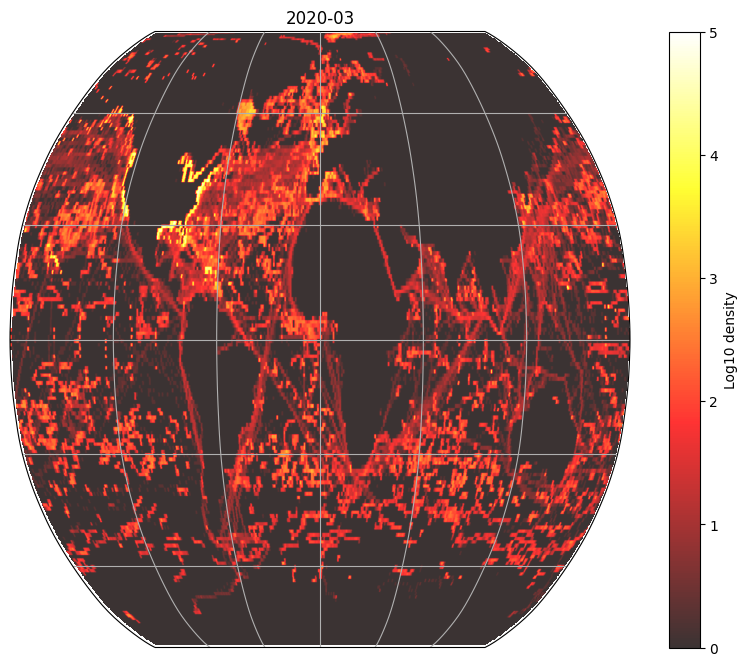

In [104]:
#### heat map ####

lat1, lon1, lat2, lon2 = -90, 0, 90, 360


# Calculate the 2D histogram
lat_bins = np.linspace(lat1, lat2, 181)
lon_bins = np.linspace(lon1, lon2, 361)
hist, _, _ = np.histogram2d(ds2.lat, ds2.lon, bins=[lat_bins, lon_bins])
# hist, _, _ = np.histogram2d(ds2.lon, ds2.lat, bins=[lon_bins, lat_bins])
hist_log = np.log10(hist + 1)  # Adding 1 to avoid taking log of zero

# Plot the heatmap
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
# ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
# ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()
plt.imshow(hist_log, origin='lower', extent=[lon1, lon2, lat1, lat2],
           cmap='hot', alpha=0.8, aspect='auto', interpolation='gaussian',
           transform=ccrs.PlateCarree(), vmin=0, vmax=5)
plt.colorbar(label='Log10 density')
plt.title(yearstr + '-' + monthstr)
plt.savefig('shipping Med ' + yearstr + '-' + monthstr + '.png', bbox_inches='tight', dpi=150)
plt.show()

In [106]:
hist.shape

(180, 360)

In [105]:
hist_log.shape

(180, 360)

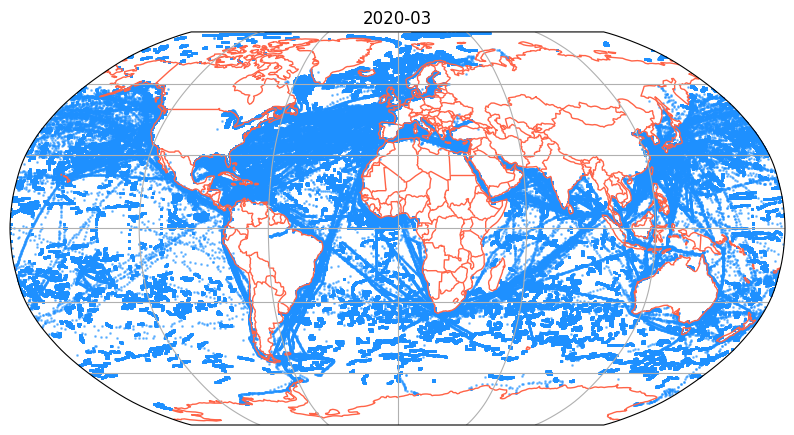

In [18]:
#####  Plot  #####

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=ds2.lon, y=ds2.lat,
            color="dodgerblue",
            s=1,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important

plt.title(yearstr+'-'+monthstr)
plt.savefig('shipping world '+yearstr+'-'+monthstr+'.png', 
               bbox_inches='tight', dpi=150)
plt.show()





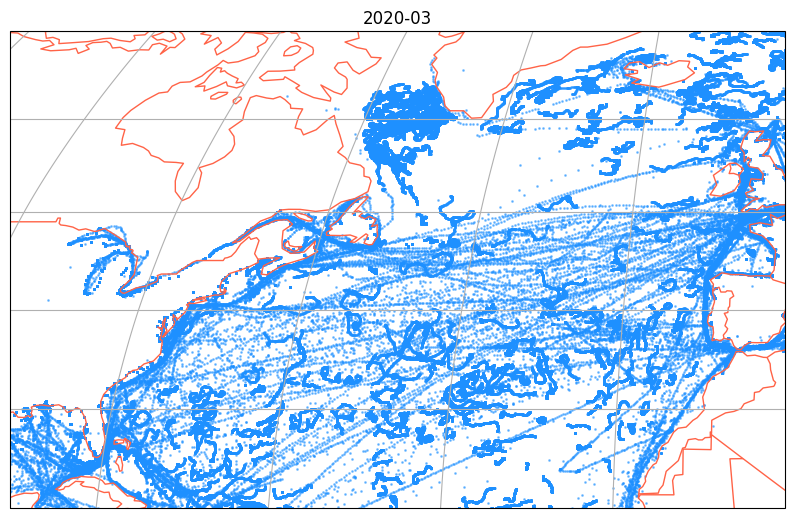

In [21]:
#Zoomed in Atlantic north


fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=ds2.lon, y=ds2.lat,
            color="dodgerblue",
            s=1,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important

lat1, lon1, lat2, lon2 = 20, -90, 70, 0
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())

plt.title(yearstr+'-'+monthstr)
plt.savefig('shipping Atlantic '+yearstr+'-'+monthstr+'.png', 
               bbox_inches='tight', dpi=150)

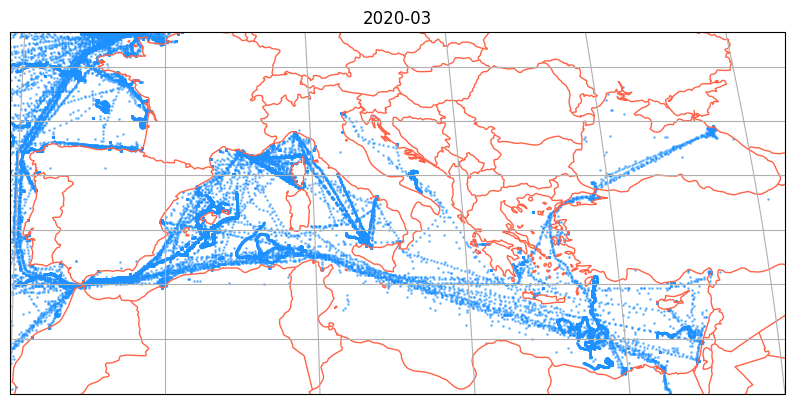

In [43]:
#Zoomed in Mediterranean


fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=ds2.lon, y=ds2.lat,
            color="dodgerblue",
            s=1,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important

lat1, lon1, lat2, lon2 = 30, -10, 50, 40
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())

plt.title(yearstr+'-'+monthstr)
plt.savefig('shipping Med '+yearstr+'-'+monthstr+'.png', 
               bbox_inches='tight', dpi=150)


plt.show()

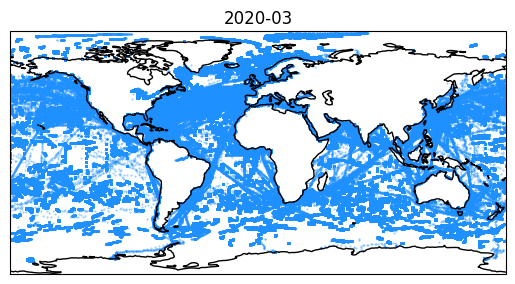

In [77]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure and axes with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the pcolor data with latitude and longitude coordinates
p = ax.scatter(ds2.lon, ds2.lat,
            color="dodgerblue",
            s=0.2,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important


# Add coastlines to the plot
ax.coastlines()

# Set the title
ax.set_title('2020-03')

# Add colorbar
# cbar = plt.colorbar(p)

# Save the figure
plt.savefig('shipping world '+yearstr+'-'+monthstr+'.png', 
               bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

# 2) load and plot albedos CERES

In [44]:
#Adapted from Diamond code below


"""
Create input data for kriging from CERES SSF1deg Terra data

Code for making kriging input data for 'Detection of large-scale cloud microphysical changes and evidence for decreasing cloud brightness within a major shipping corridor due to the 2020 International Maritime Organization marine fuel sulfur regulations'

Modifications
-------------
11 April 2023: Michael Diamond, Tallahassee, FL
    -Created
10 May 2023: Michael Diamond, Tallahassee, FL
    -Final form for ACP Letters initial submission
"""

#Import libraries
import numpy as np
import xarray as xr
from scipy import stats
from glob import glob
import os
import warnings

import matplotlib.pyplot as plt


In [45]:
import xarray as xr

filepath='/Users/micheltsamados/Downloads/'
# ds = xr.open_dataset(filepath+'20220303.S5P.TROPOMI.SO2.PGL.nc')
# print(ds)

#
###Load and manipulate SSF1deg data
#

#Load data
Terra = xr.open_dataset(filepath+'CERES_SSF1deg-Month_Terra-MODIS_Ed4.1_Subset_202001-202012.nc')
# Terra = xr.open_dataset(glob(dir_data+'CERES/SSF1deg/CERES_SSF1deg-Month_Terra-MODIS_Ed4.1_Subset_*.nc')[0])

#Calculate albedo, total cloud fraction, and overcast albedo
Terra['A'] = Terra['toa_sw_all_mon']/Terra['toa_solar_all_mon']

Terra['C'] = (Terra['cldarea_high_day_mon']+Terra['cldarea_mid_high_day_mon']+Terra['cldarea_mid_low_day_mon']+Terra['cldarea_low_day_mon'])/100

Terra['Acld'] = (Terra['A']-(1-Terra['C'])*.1)/Terra['C'] #Assumes Aclr = 0.1

Terra['Clow'] = Terra['cldarea_low_day_mon']/100

In [46]:
Terra

<xarray.Dataset>
Dimensions:                              (lon: 360, lat: 180, time: 12)
Coordinates:
  * lon                                  (lon) float32 0.5 1.5 ... 358.5 359.5
  * lat                                  (lat) float32 -89.5 -88.5 ... 88.5 89.5
  * time                                 (time) datetime64[ns] 2020-01-15 ......
Data variables: (12/286)
    toa_sw_all_mon                       (time, lat, lon) float32 ...
    toa_sw_clr_mon                       (time, lat, lon) float32 ...
    toa_lw_all_mon                       (time, lat, lon) float32 ...
    toa_lw_clr_mon                       (time, lat, lon) float32 ...
    toa_wn_all_mon                       (time, lat, lon) float32 ...
    toa_wn_clr_mon                       (time, lat, lon) float32 ...
    ...                                   ...
    aux_cld_mask_strong_mon              (time, lat, lon) float32 ...
    aux_cld_mask_weak_mon                (time, lat, lon) float32 ...
    A                                    (time, lat, lon) float32 0.6822 ... nan
    C                                    (time, lat, lon) float32 0.5205 ... nan
    Acld                                 (time, lat, lon) float32 1.219 ... nan
    Clow                                 (time, lat, lon) float32 0.0004744 ....
Attributes:
    title:        CERES SSF1deg Products - Monthly Means
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:       
    version:      Edition4.1: Release Date July 10, 2020
    DOI:          10.5067/Terra/CERES/SSF1degMonth_L3.004A
    Fill_Value:   Fill Value is -999.0

In [59]:
Terra['lon'].shape

(360,)

In [60]:
lon_Terra, lat_Terra=np.meshgrid(Terra['lon'],Terra['lat'])

In [61]:
lon_Terra.shape

(180, 360)

In [62]:
Terra['A'][3].shape

(180, 360)

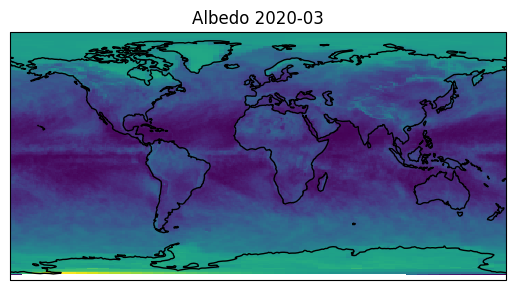

In [78]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure and axes with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the pcolor data with latitude and longitude coordinates
p = ax.pcolor(lon_Terra, lat_Terra, Terra['A'][3], transform=ccrs.PlateCarree())

# Add coastlines to the plot
ax.coastlines()

# Set the title
ax.set_title('Albedo 2020-03')

# Add colorbar
# cbar = plt.colorbar(p)

# Save the figure
plt.savefig('Albedo CERES 2020-03.png', bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

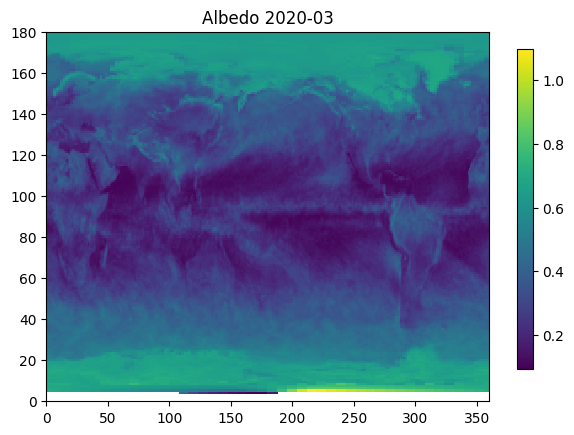

In [70]:
plt.pcolor(Terra['A'][3])
plt.title('Albedo 2020-03')


# Add the colorbar
cbar = plt.colorbar()

# Adjust the layout to make room for the colorbar
plt.subplots_adjust(right=0.99)  # Increase the right margin

# Position the colorbar closer to the figure
cbar.ax.set_position([0.86, 0.01, 0.025, 1])  # Adjust the position and size as needed


plt.savefig('Albedo CERES 2020-03.png', bbox_inches='tight', dpi=150)



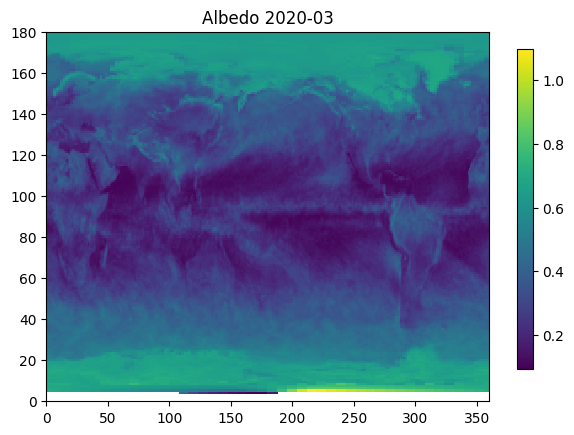

In [47]:
plt.pcolor(Terra['A'][3])
plt.title('Albedo 2020-03')


# Add the colorbar
cbar = plt.colorbar()

# Adjust the layout to make room for the colorbar
plt.subplots_adjust(right=0.99)  # Increase the right margin

# Position the colorbar closer to the figure
cbar.ax.set_position([0.86, 0.01, 0.025, 1])  # Adjust the position and size as needed


plt.savefig('Albedo CERES 2020-03.png', bbox_inches='tight', dpi=150)



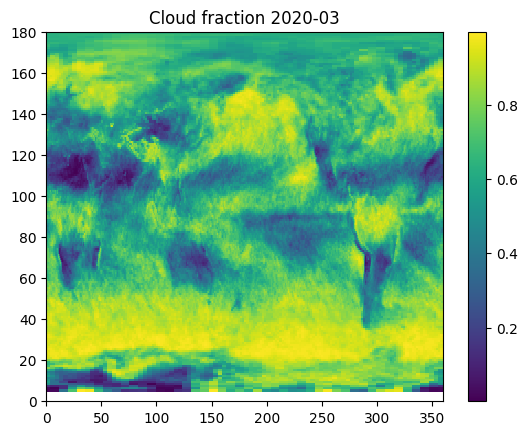

In [48]:
plt.pcolor(Terra['C'][3])
plt.title('Cloud fraction 2020-03')
plt.savefig('Cloud_Fraction_CERES_202003.png', 
               bbox_inches='tight', dpi=150)
plt.colorbar()

In [50]:
# plt.pcolor(Terra['Acld'][9])
# plt.colorbar()

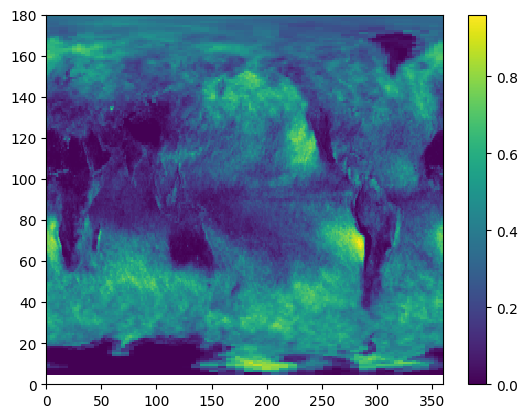

In [51]:
plt.pcolor(Terra['Clow'][3])
plt.colorbar()

# 3) Interpolate albedo on shipping tracks

In [53]:
from scipy import stats
from scipy.interpolate import griddata

import cartopy.crs as ccrs
import cartopy.feature as cfea
from pyproj import Transformer
import cartopy.feature as cfeature


In [55]:
#Project shipping lon - lat onto PlateCarree projection


# Assuming x and y are longitude and latitude grids
x = ds2.lon.values
y = ds2.lat.values

# Define the Plate Carrée projection
plate_carree = ccrs.PlateCarree()

# Transform the x and y grids to x and y coordinates in Plate Carrée
transformed_coords = plate_carree.transform_points(ccrs.PlateCarree(), x, y)
x_new, y_new = transformed_coords[..., 0], transformed_coords[..., 1]

# Print the resulting x and y coordinates
print("x:", x_new)
print("y:", y_new)

x: [31.5        29.61000061 31.43000031 ... 57.45000076 51.31000137
 21.05999947]
y: [ 88.19999695  88.11000061  87.93000031 ... -27.60000038 -28.62999916
 -40.95000076]


In [56]:
x_new.shape

(4918056,)

In [68]:
#Project CERES albedo lon_Terra - lat_Terra onto PlateCarree projection


# Assuming x and y are longitude and latitude grids
x_Terra = lon_Terra
y_Terra = lat_Terra

# Define the Plate Carrée projection
plate_carree = ccrs.PlateCarree()

# Transform the x and y grids to x and y coordinates in Plate Carrée
transformed_coords = plate_carree.transform_points(ccrs.PlateCarree(), x_Terra, y_Terra)
x_Terra_new, y_Terra_new = transformed_coords[..., 0], transformed_coords[..., 1]

# Print the resulting x and y coordinates
print("x:", x_Terra_new)
print("y:", y_Terra_new)

x: [[ 0.5  1.5  2.5 ... -2.5 -1.5 -0.5]
 [ 0.5  1.5  2.5 ... -2.5 -1.5 -0.5]
 [ 0.5  1.5  2.5 ... -2.5 -1.5 -0.5]
 ...
 [ 0.5  1.5  2.5 ... -2.5 -1.5 -0.5]
 [ 0.5  1.5  2.5 ... -2.5 -1.5 -0.5]
 [ 0.5  1.5  2.5 ... -2.5 -1.5 -0.5]]
y: [[-89.5 -89.5 -89.5 ... -89.5 -89.5 -89.5]
 [-88.5 -88.5 -88.5 ... -88.5 -88.5 -88.5]
 [-87.5 -87.5 -87.5 ... -87.5 -87.5 -87.5]
 ...
 [ 87.5  87.5  87.5 ...  87.5  87.5  87.5]
 [ 88.5  88.5  88.5 ...  88.5  88.5  88.5]
 [ 89.5  89.5  89.5 ...  89.5  89.5  89.5]]


In [69]:
y_Terra_new.shape

(180, 360)

In [79]:
Terra['A'][3].shape

(180, 360)

In [89]:
#interpolate CERES albedo values onto shipping tracks


from scipy.interpolate import griddata

Albedo_ontrack=griddata((x_Terra_new.ravel(),y_Terra_new.ravel()),Terra['A'][3].values.ravel(),(x_new,y_new),method='nearest')


In [90]:
Albedo_ontrack.shape

(4918056,)

In [91]:
x_new.shape

(4918056,)

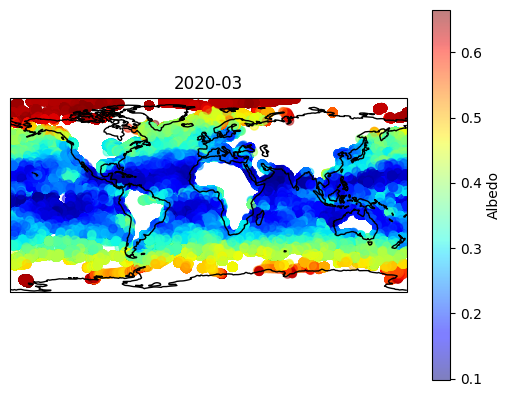

In [94]:
# Create a figure and axes with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the pcolor data with latitude and longitude coordinates and different colors
p = ax.scatter(ds2.lon, ds2.lat, c=Albedo_ontrack, cmap='jet',
               alpha=0.5, transform=ccrs.PlateCarree())

# Add coastlines to the plot
ax.coastlines()

# Set the title
ax.set_title('2020-03')

# Add colorbar
cbar = plt.colorbar(p)

# Set the label for the colorbar
cbar.set_label('Albedo')

# Save the figure
plt.savefig('Albedo on shipping world '+yearstr+'-'+monthstr+'.png', bbox_inches='tight', dpi=150)

# Show the plot
plt.show()



# 4) Analysis of albedo

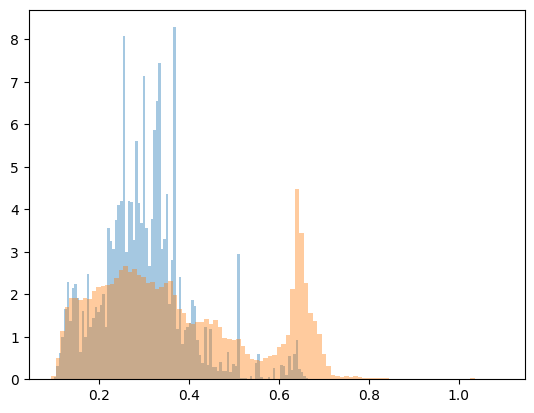

In [102]:
plt.hist(Albedo_ontrack,bins=100, density=True,alpha=0.4);
plt.hist(Terra['A'][3].values.ravel(),bins=100, density=True,alpha=0.4);



In [108]:
hist_log.shape

(180, 360)

In [107]:
Terra['A'][3].shape

(180, 360)

In [110]:
#interpolate hist and hist_log onto tracks
hist_log_ontrack=griddata((x_Terra_new.ravel(),y_Terra_new.ravel()),hist_log.ravel(),(x_new,y_new),method='nearest')



In [113]:
Albedo_ontrack[hist_log_ontrack>4].shape

(2371698,)

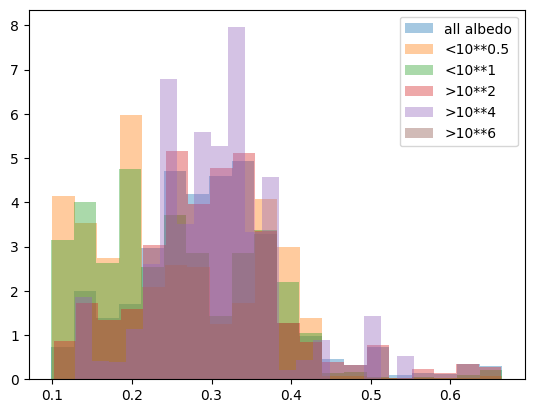

In [131]:
plt.hist(Albedo_ontrack,bins=20, density=True,alpha=0.4, label='all albedo');
plt.hist(Albedo_ontrack[hist_log_ontrack<0.5],bins=20, density=True,alpha=0.4, label='<10**0.5');
plt.hist(Albedo_ontrack[hist_log_ontrack<1],bins=20, density=True,alpha=0.4, label='<10**1');


# plt.hist(Albedo_ontrack[hist_log_ontrack>1],bins=20, density=True,alpha=0.4);
plt.hist(Albedo_ontrack[hist_log_ontrack>2],bins=20, density=True,alpha=0.4, label='>10**2');
# plt.hist(Albedo_ontrack[hist_log_ontrack>3],bins=20, density=True,alpha=0.4);
plt.hist(Albedo_ontrack[hist_log_ontrack>4],bins=20, density=True,alpha=0.4, label='>10**4');
# plt.hist(Albedo_ontrack[hist_log_ontrack>5],bins=20, density=True,alpha=0.4);
plt.hist(Albedo_ontrack[hist_log_ontrack>6],bins=20, density=True,alpha=0.4, label='>10**6');
plt.legend()




In [128]:
Albedo_ontrack[hist_log_ontrack>4.6].shape

(931016,)

In [129]:
Albedo_ontrack[hist_log_ontrack<0.5].shape

(39905,)